In [1]:
import os
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
sc.settings.set_figure_params(dpi=100, frameon=False)
model = 'tranvae'

dir_path = os.path.expanduser(f'~/Documents/benchmarking_results/figure_1/{model}/ood_2/')
save_path = f'{dir_path}revision_2/'
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [3]:
ref = sc.read(f'{dir_path}reference_data.h5ad')
ref

AnnData object with n_obs × n_vars = 7291 × 10
    obs: 'celltype', 'batch', 'predictions', 'leiden'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [4]:
f1 = sc.read(f'{dir_path}full_1_data.h5ad')
f1.obs.batch = f1.obs.batch.replace('Pancreas SS2', 'Pancreas SS2 (query 1)')
f1.obs.celltype = f1.obs.celltype.replace('Pancreas Gamma', 'Pancreas Gamma NEW')
f1.obs.celltype = f1.obs.celltype.replace('Pancreas Alpha', 'Pancreas Alpha NEW')
f1

AnnData object with n_obs × n_vars = 10252 × 10
    obs: 'celltype', 'batch', 'predictions', 'leiden'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
f2 = sc.read(f'{dir_path}full_2_data.h5ad')
f2.obs.batch = f2.obs.batch.replace('Pancreas SS2', 'Pancreas SS2 (query 1)')
f2.obs.batch = f2.obs.batch.replace('Pancreas CelSeq2', 'Pancreas CelSeq2 (query 2)')
f2.obs.celltype = f2.obs.celltype.replace('Pancreas Gamma', 'Pancreas Gamma NEW')
f2.obs.celltype = f2.obs.celltype.replace('Pancreas Alpha', 'Pancreas Alpha NEW')
f2

AnnData object with n_obs × n_vars = 12678 × 10
    obs: 'celltype', 'batch', 'predictions', 'leiden'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [6]:
b_c = sc.pl.palettes.godsnot_102[10:15]
batch_color = [b_c[2], b_c[3], b_c[0],b_c[4], b_c[1]]
ct_c = sc.pl.palettes.godsnot_102
ct_color = [ct_c[0], ct_c[2],ct_c[3],ct_c[4],ct_c[5],ct_c[7],ct_c[6],ct_c[1]]

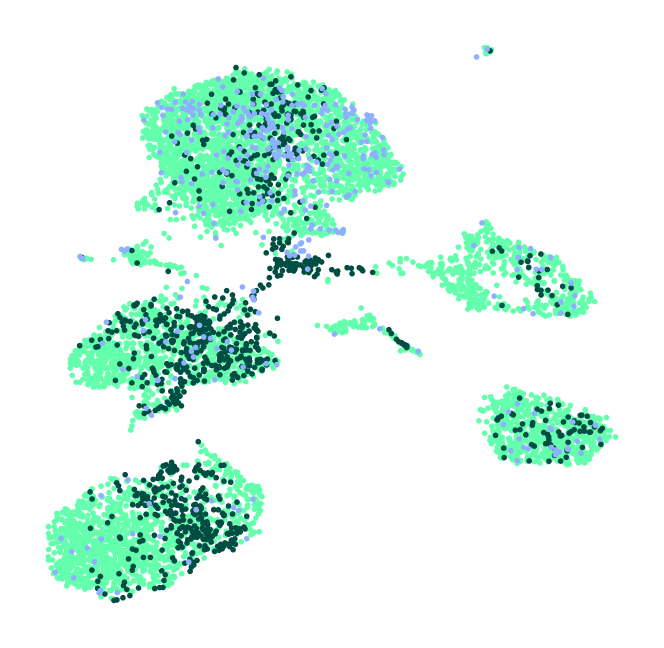

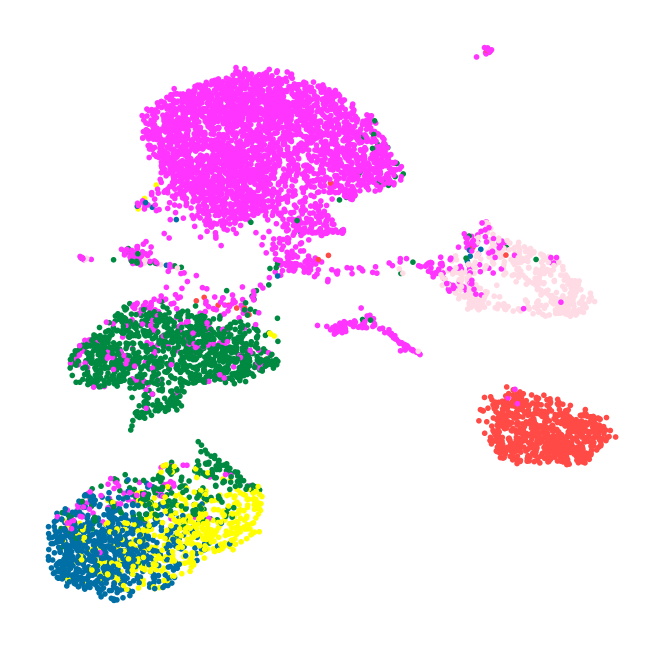

In [7]:
sc.pl.umap(
    ref,
    color="batch",
    frameon=False,
    ncols=1,
    show=False,
    title='',
    legend_loc="no_legend",
    palette=batch_color
)
plt.savefig(f"{save_path}ref_batch.pdf", bbox_inches='tight')
sc.pl.umap(
    ref,
    color="celltype",
    frameon=False,
    ncols=1,
    show=False,
    title='',
    legend_loc="no_legend",
    palette=ct_color
)
plt.savefig(f"{save_path}ref_ct.pdf", bbox_inches='tight')

In [8]:
f1_b = [batch_color[0],batch_color[1],batch_color[3],batch_color[2]]
f1_c = [ct_color[0],ct_color[7],ct_color[1],ct_color[2],ct_color[3],ct_color[4],ct_color[6],ct_color[5]]

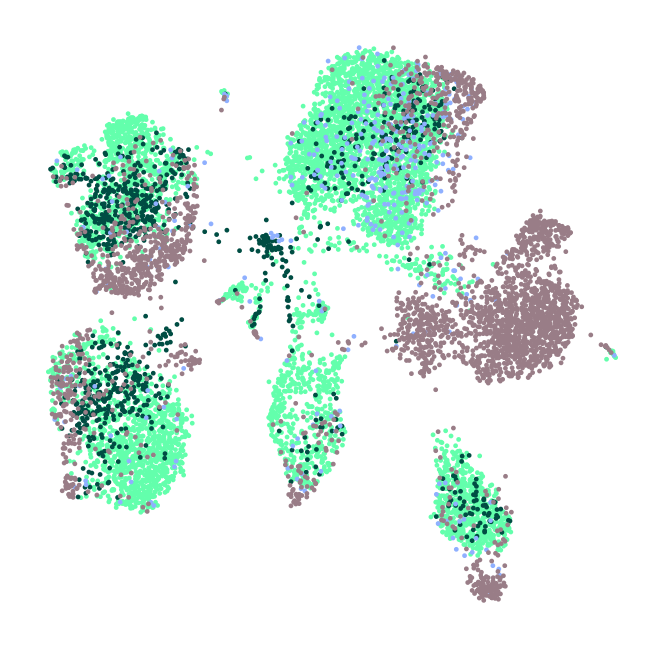

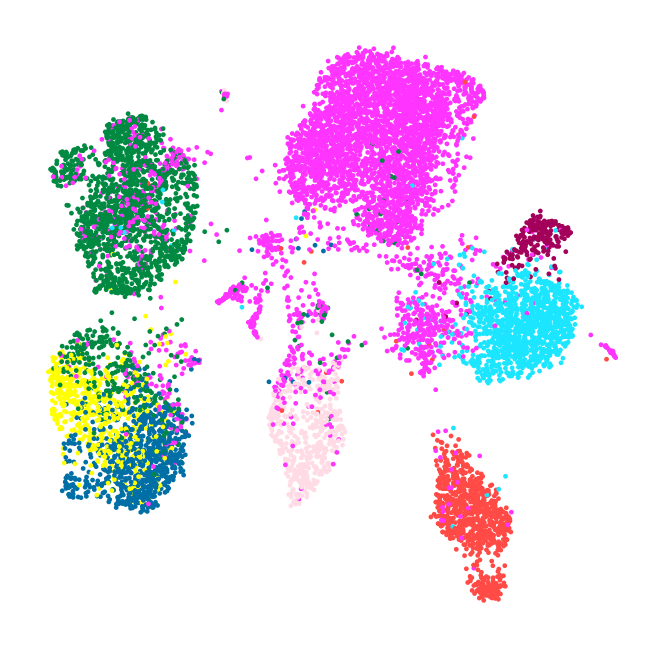

In [9]:
sc.pl.umap(
    f1,
    color="batch",
    frameon=False,
    ncols=1,
    show=False,
    title='',
    legend_loc="no_legend",
    palette=f1_b
)
plt.savefig(f"{save_path}f1_batch.pdf", bbox_inches='tight')
sc.pl.umap(
    f1,
    color="celltype",
    frameon=False,
    ncols=1,
    show=False,
    title='',
    legend_loc="no_legend",
    palette=f1_c
)
plt.savefig(f"{save_path}f1_ct.pdf", bbox_inches='tight')

In [10]:
f2_b = [batch_color[0],batch_color[4],batch_color[1],batch_color[3],batch_color[2]]
f2_c = [ct_color[0],ct_color[7],ct_color[1],ct_color[2],ct_color[3],ct_color[4],ct_color[6],ct_color[5]]

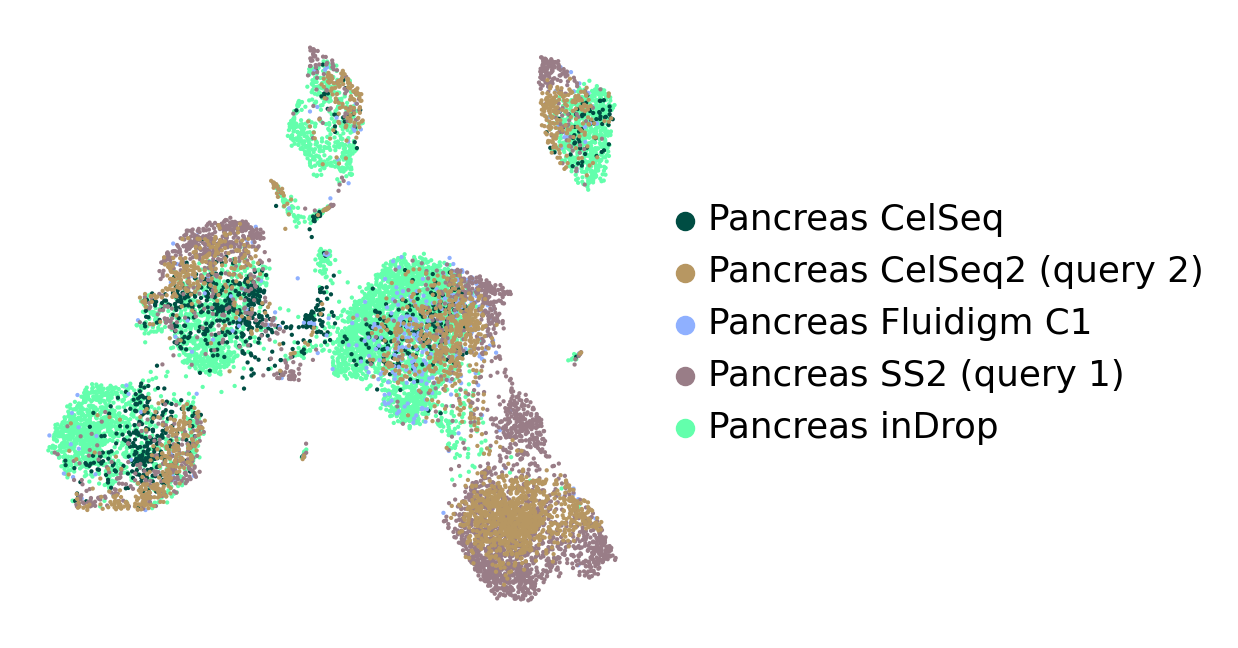

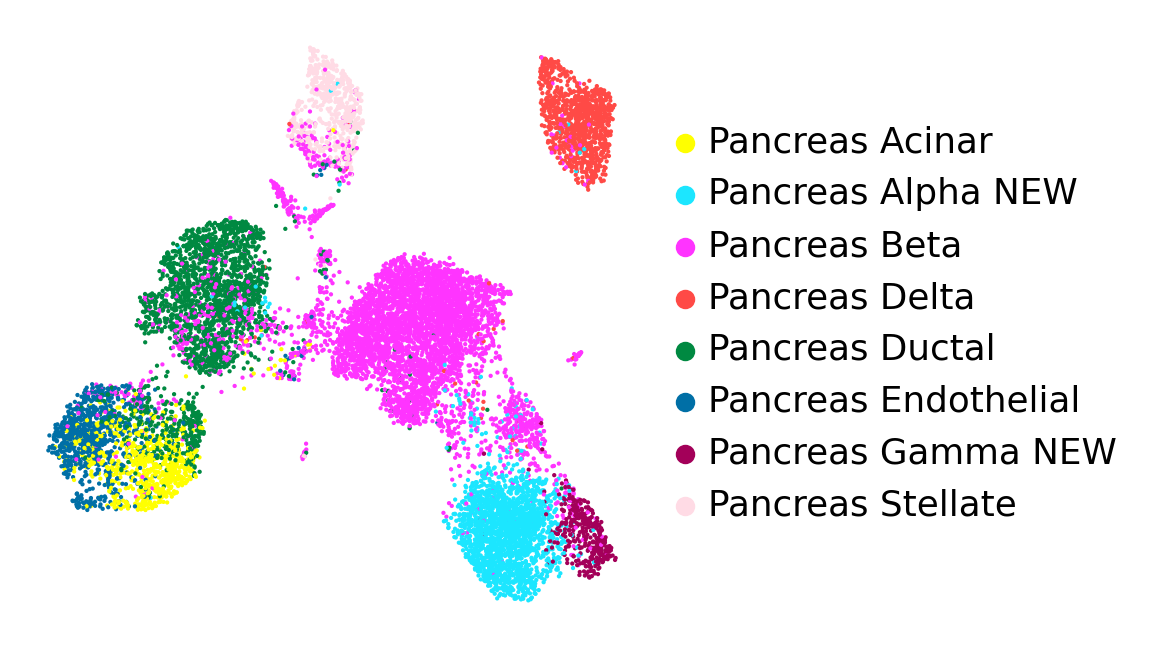

In [11]:
sc.pl.umap(
    f2,
    color="batch",
    frameon=False,
    ncols=1,
    show=False,
    title='',
    palette=f2_b
)
plt.savefig(f"{save_path}f2_batch.pdf", bbox_inches='tight')
sc.pl.umap(
    f2,
    color="celltype",
    frameon=False,
    ncols=1,
    show=False,
    title='',
    palette=f2_c
)
plt.savefig(f"{save_path}f2_ct.pdf", bbox_inches='tight')